<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


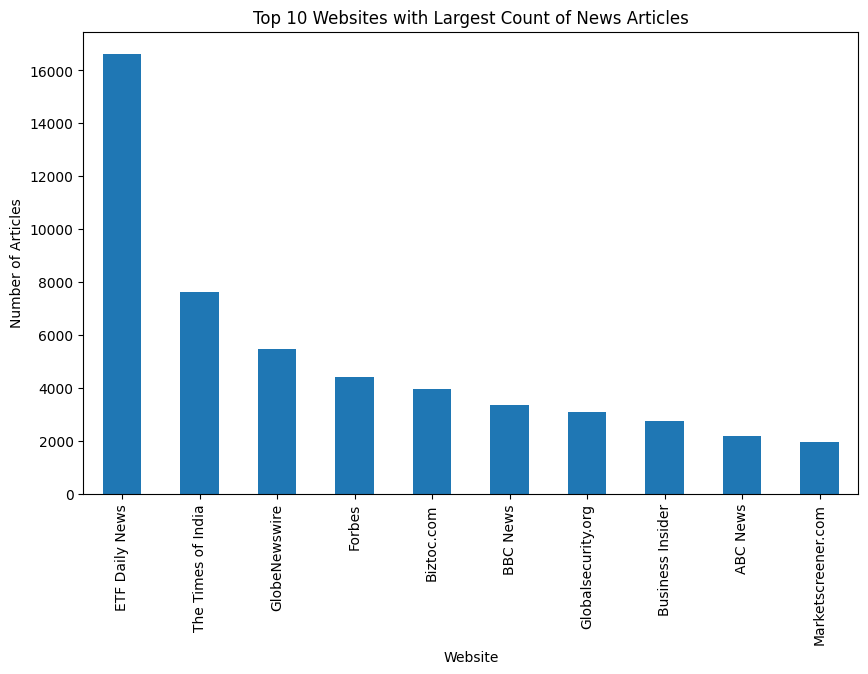

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_1samp
import numpy as np
domains_df = pd.read_csv('../data/domains_location.csv')

news_df = pd.read_csv('../data/data.csv')
top_websites = news_df['source_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_websites.plot(kind='bar')
news_df.info()
plt.title('Top 10 Websites with Largest Count of News Articles')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

news_df = news_df.dropna(subset=['title'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(news_df['title'])

nmf_model = NMF(n_components=10, random_state=1)
nmf_model.fit(tfidf)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i+1}:")
    print([tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic 1:
['acquires', 'purchases', 'capital', 'group', 'management', 'sold', 'llc', 'sells', 'nyse', 'shares']
Topic 2:
['investment', 'hits', 'week', 'announces', 'zealand', 'low', 'year', 'high', 'york', 'new']
Topic 3:
['10', 'announces', 'reports', 'financial', 'november', 'october', 'best', 'quarter', 'results', '2023']
Topic 4:
['ukraine', 'biden', 'iran', 'conflict', 'attack', 'israeli', 'war', 'hamas', 'gaza', 'israel']
Topic 5:
['investment', '000', 'capital', 'million', 'management', 'llc', 'position', 'holdings', 'nyse', 'stock']
Topic 6:
['report', 'reach', '2032', 'research', 'size', 'usd', 'cagr', 'global', 'billion', 'market']
Topic 7:
['hold', 'buy', 'group', 'earnings', 'analysts', 'coverage', 'rating', 'stocknews', 'com', 'nasdaq']
Topic 8:
['win', 'england', 'south', 'africa', 'final', 'australia', 'cricket', 'india', 'cup', 'world']
Topic 9:
['help', 'president', 'uk', 'russia', 'generative', 'google', 'ukraine', 'china', 'says', 'ai']
Topic 10:
['given', 'cut', 'av

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'title' column
news_df['title_sentiment'] = news_df['title'].apply(get_sentiment)

# Categorize sentiment as positive, neutral, or negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

news_df['title_sentiment_category'] = news_df['title_sentiment'].apply(categorize_sentiment)

print(news_df[['title', 'title_sentiment', 'title_sentiment_category']].head())
X = tfidf
y = news_df['title_sentiment_category']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

                                               title  title_sentiment  \
0  UN Chief Urges World To 'Stop The Madness' Of ...         0.000000   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。         0.000000   
2  UN Chief Urges World to 'Stop the Madness' of ...         0.000000   
3  Sikkim warning: Hydroelectricity push must be ...         0.000000   
4  200 foreigners, dual nationals cut down in Ham...        -0.155556   

  title_sentiment_category  
0                  neutral  
1                  neutral  
2                  neutral  
3                  neutral  
4                 negative  
Model Accuracy: 0.82
